#Notebook 1 del Proyecto Integrador de Aprendizaje
Equipo No.2

Integrantes:

> Iran Alexandra Arevalo Rodriguez--------1942711

> Marcela Morales Guzmán--------------------1853369

> Teodoro D. A. Charles Maldonado-------1991867












In [24]:
#librerias
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import glob
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import mnist

# Preprocesamiento

En esta sección se importan las imágenes, se reescalan y se dividen en grupo de entrenamiento y grupo de validación. 

El dataset creado por nosotros se dividio en 80% para entrenamiento(training) y 20% para comprobacion(test) mediante ciclos for anidados que daban como parametros el 80/20


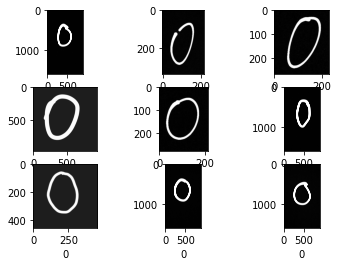

In [25]:
#lee las imagenes por orden de numero y crea un array separado para las etiquetas
array_0 = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob("/content/imgs_3/0*")]
ar_label0 = ['0' for file in array_0]
array_1 = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob("/content/imgs_3/1*")]
ar_label1 = ['1' for file in array_1]
array_2 = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob("/content/imgs_3/2*")]
ar_label2 = ['2' for file in array_2]
array_3 = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob("/content/imgs_3/3*")]
ar_label3 = ['3' for file in array_3]
array_4 = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob("/content/imgs_3/4*")]
ar_label4 = ['4' for file in array_4]
array_5 = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob("/content/imgs_3/5*")]
ar_label5 = ['5' for file in array_5]
array_6 = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob("/content/imgs_3/6*")]
ar_label6 = ['6' for file in array_6]
array_7 = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob("/content/imgs_3/7*")]
ar_label7 = ['7' for file in array_7]
array_8 = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob("/content/imgs_3/8*")]
ar_label8 = ['8' for file in array_8]
array_9 = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob("/content/imgs_3/9*")]
ar_label9 = ['9' for file in array_9]

#se suman todos los arrays de imagenes y etiquetas respectivamente
array_all = array_0+array_1+array_2+array_3+array_4+array_5+array_6+array_7+array_8+array_9
ar_label = ar_label0+ar_label1+ar_label2+ar_label3+ar_label4+ar_label5+ar_label6+ar_label7+ar_label8+ar_label9

#corroborar visualmente que se hayan sumado bien
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(array_all[i], cmap=plt.get_cmap('gray'))
	plt.xlabel(ar_label[i])
plt.show()

300


Text(0.5, 0, '0')

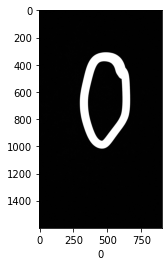

In [26]:
#corroborar
print(len(array_all))
plt.imshow(array_all[5], cmap='gray')
plt.xlabel(ar_label[5])

Total files after resize: 300


Text(0.5, 0, '0')

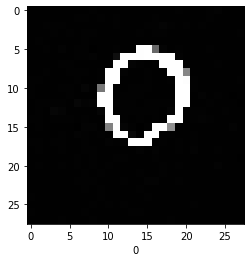

In [27]:
#toma todas las imagenes de la carpeta, aplica resize y contraste.
# array_raw = []
# print("Total files before upload:",len(array_raw))
# array_raw = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob("/content/imgs/*.jp*g")]
    #array_raw = [cv2.bitwise_not(file) for file in array_raw] # no se requiere, todas las imagenes son letra blanca y fondo negro
# print("Total files before resize:",len(array_raw))
# plt.imshow(array_raw[5], cmap='gray')
# TODO LO DE ARRIBA ES PARTE DE LA ACT3, PERO COMO EN ESTE CASO, ARRAY_RAW = ARRAY_ALL, YA NO SE REQUIERE

## preprocesado de las imagenes
array_resized = [cv2.resize(file, (28,28), interpolation=cv2.INTER_LINEAR) for file in array_all]
print("Total files after resize:",len(array_resized))

## visualizacion del preprocesado
plt.imshow(array_resized[5], cmap='gray')
plt.xlabel(ar_label[5])

Text(0.5, 0, '3')

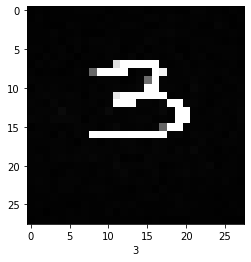

In [28]:
## visualizacion del preprocesado
plt.imshow(array_resized[107], cmap='gray')
plt.xlabel(ar_label[107])

Text(0.5, 0, '6')

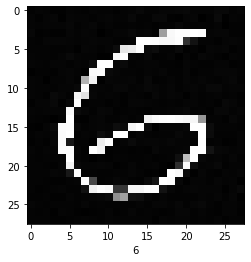

In [29]:
##visualizacion del preprocesado
plt.imshow(array_resized[204], cmap='gray')
plt.xlabel(ar_label[204])

In [30]:
## separacion de set de entrenamiento y validacion
train_imgs = []
train_lbs = []
test_imgs = []
test_lbs = []
i = 0
j = 0
for i in range(0, len(array_resized), 30):
  for j in range(24):                       # 80% train
    train_imgs.append(array_resized[i+j])
    train_lbs.append(ar_label[i+j])
  for j in range(6):                        # 20% test
    test_imgs.append(array_resized[i+24+j])
    test_lbs.append(ar_label[i+24+j])

##corrobora que la longitud siga sumando 300
print(len(train_imgs))
print(len(train_lbs))
print(len(test_imgs))
print(len(test_lbs))


240
240
60
60


Text(0.5, 0, '8')

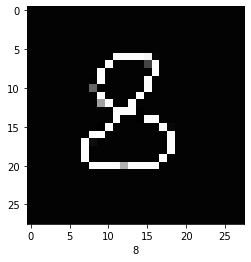

In [31]:
## corroboracion visual de la imagen con su label
plt.imshow(train_imgs[204], cmap='gray')
plt.xlabel(train_lbs[204])

Text(0.5, 0, '9')

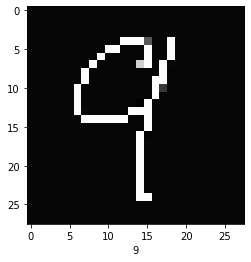

In [32]:
# corroboracion visual de la imagen con su label
plt.imshow(test_imgs[54], cmap='gray')
plt.xlabel(test_lbs[54])

In [33]:
# convierte los arrays en numpy arrays porque asi lo requiere la funcion model.fit()
test_lbs = np.array(test_lbs)
train_lbs = np.array(train_lbs)
test_imgs = np.array(test_imgs)
train_imgs = np.array(train_imgs)


# convierte la variable dependiente de forma categorica a forma numerica, porque asi lo requiere la funcion model.fit()
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
test_lbs = lb.fit_transform(test_lbs)
train_lbs = lb.fit_transform(train_lbs)


(60,)
<class 'numpy.ndarray'>
(60, 28, 28)
<class 'numpy.ndarray'>
(240,)
<class 'numpy.ndarray'>
(240, 28, 28)
<class 'numpy.ndarray'>


In [34]:
## tranformacion de las variables
train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0

# Estructura y entrenamiento de Red Neuronal Artificial Convolusional (RNAC)

En esta sección se establece la cantidad de capas de convolusión y capas de aprendizaje para nuestra red neuronal artificial convolusional. 

In [36]:
## aqui empieza la red neuronal
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [38]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [52]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_imgs, train_lbs, epochs=10, 
                    validation_data=(test_imgs, test_lbs))  ## notese que se cambia train_images por la lista generada por nosotros, train_imgs y asi

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 1s 53ms/step - loss: 0.2957 - accuracy: 0.9292 - val_loss: 0.8500 - val_accuracy: 0.7500
Epoch 2/10
8/8 [==============================] - 0s 34ms/step - loss: 0.1893 - accuracy: 0.9375 - val_loss: 0.6746 - val_accuracy: 0.7333
Epoch 3/10
8/8 [==============================] - 0s 35ms/step - loss: 0.1325 - accuracy: 0.9667 - val_loss: 0.5845 - val_accuracy: 0.7833
Epoch 4/10
8/8 [==============================] - 0s 38ms/step - loss: 0.0946 - accuracy: 0.9833 - val_loss: 0.6442 - val_accuracy: 0.8167
Epoch 5/10
8/8 [==============================] - 1s 69ms/step - loss: 0.0602 - accuracy: 0.9917 - val_loss: 0.5520 - val_accuracy: 0.7833
Epoch 6/10
8/8 [==============================] - 0s 35ms/step - loss: 0.0385 - accuracy: 1.0000 - val_loss: 0.8710 - val_accuracy: 0.8000
Epoch 7/10
8/8 [==============================] - 0s 58ms/step - loss: 0.0474 - accuracy: 0.9875 - val_loss: 0.7711 - val_accuracy: 0.7833
Epoch 8/10
8/8 [======================

Resultados de exactitud de la RNAC


2/2 - 0s - loss: 0.7499 - accuracy: 0.8167 - 33ms/epoch - 17ms/step


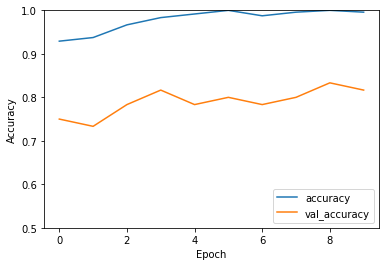

In [53]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_imgs,  test_lbs, verbose=2) ## aqui tambien se modifica

In [54]:
print(test_acc)

0.8166666626930237


# Predicciones con la RNAC entrenada. 
 Se muestran al menos 3 predicciones de dígitos del 0 al 9.

In [55]:
predictions = model.predict(test_imgs)

In [62]:
x = np.argmax(predictions[5])
y = test_lbs[5]
x = str(x)
y = str(y)
print("La red dice que la imagen es clase " + x + " y la clase verdadera es: " + y )

La red dice que la imagen es clase 0 y la clase verdadera es: 0


In [60]:
x = np.argmax(predictions[25])
y = test_lbs[25]
x = str(x)
y = str(y)
print("La red dice que la imagen es clase " + x + " y la clase verdadera es: " + y )

La red dice que la imagen es clase 4 y la clase verdadera es: 4


In [61]:
x = np.argmax(predictions[51])
y = test_lbs[51]
x = str(x)
y = str(y)
print("La red dice que la imagen es clase " + x + " y la clase verdadera es: " + y )

La red dice que la imagen es clase 3 y la clase verdadera es: 8
